### 의사결정나무(DT)
- IF-ELSE 방식의 질문에 대한 답변으로 문제를 해결하는 알고리즘
- 피쳐(특성) 중에서 선택한 기준으로 데이터 분할
    * 엔트로피 (불순정도) => 낮아지는 방향
    * 정보이득 : 1-엔트로피 => 높아지는 방향
    * 지니계수 : 불평등수치값 => 낮아지는 방향
- 단점 : 과대적합이 될 가능성 높음! 성능이 좋지 않음
- 장점 : 전처리 영향을 받지 않음 / 직관성이 높음 / 피쳐들 중 주요 피쳐 확인 가능
- 주의
    * 여기서의 주요 피쳐는 데이터 분할을 위한 주요 피쳐
    * 100% 데이터의 주요 피쳐가 아닐수도 있음 => 다른 검사(상관계수, 시각화 등등)와 함께 평가

In [81]:
import pandas as pd

df=pd.read_csv("../data/iris.csv", header=None)

In [82]:
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [83]:
from sklearn.model_selection import train_test_split
feature=df[df.columns[:-1]]
target=df[df.columns[-1]]
x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, stratify=target)

In [1]:
from sklearn.utils.discovery import all_estimators
allAlgorithms=all_estimators(type_filter='regressor') # 모든 분류 알고리즘 
for model_name, model in allAlgorithms:
    print(model_name)

ARDRegression
AdaBoostRegressor
BaggingRegressor
BayesianRidge
CCA
DecisionTreeRegressor
DummyRegressor
ElasticNet
ElasticNetCV
ExtraTreeRegressor
ExtraTreesRegressor
GammaRegressor
GaussianProcessRegressor
GradientBoostingRegressor
HistGradientBoostingRegressor
HuberRegressor
IsotonicRegression
KNeighborsRegressor
KernelRidge
Lars
LarsCV
Lasso
LassoCV
LassoLars
LassoLarsCV
LassoLarsIC
LinearRegression
LinearSVR
MLPRegressor
MultiOutputRegressor
MultiTaskElasticNet
MultiTaskElasticNetCV
MultiTaskLasso
MultiTaskLassoCV
NuSVR
OrthogonalMatchingPursuit
OrthogonalMatchingPursuitCV
PLSCanonical
PLSRegression
PassiveAggressiveRegressor
PoissonRegressor
QuantileRegressor
RANSACRegressor
RadiusNeighborsRegressor
RandomForestRegressor
RegressorChain
Ridge
RidgeCV
SGDRegressor
SVR
StackingRegressor
TheilSenRegressor
TransformedTargetRegressor
TweedieRegressor
VotingRegressor


In [85]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier(criterion="entropy")
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [86]:
# 생성된 구조 모델 시각화
from sklearn.tree import export_graphviz
from sklearn import tree
export_graphviz(model, 
                out_file='tree.dot', 
                feature_names=["Sepal Length","Sepal Width","petal Length","petal Width"], 
                class_names=["setosa","versicolor","virginica"], 
                filled=True, 
                rounded=True, 
                special_characters=True)


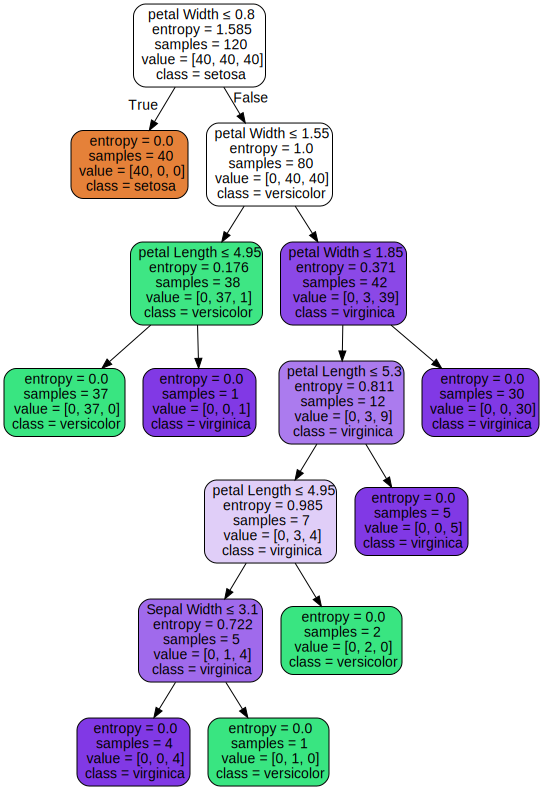

In [87]:
from graphviz import Source
Source.from_file("tree.dot")

In [88]:
train_score=model.score(x_train, y_train)
test_score=model.score(x_test, y_test)

print(f'[TRAIN]{train_score}, [TEST]{test_score}') # 과대적합이 나버린다

[TRAIN]1.0, [TEST]0.9666666666666667


In [89]:
# 문제 해결 및 성능 향상(튜닝)
# 원인1 : 데이터 셋 부족 => 교차 검증(cv)
# 하이퍼파라미터 기본값으로만 사용 => 다양한 값 조절
# => 2개의 원인을 해결하기 위해서 GridSearchCV사용
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# 모델 조합
dt_model=DecisionTreeClassifier()
n_cv=5
params={
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [5,10,15],
    'min_samples_split': [2,3,4],
}
gs=GridSearchCV(dt_model, param_grid=params, cv=n_cv)
gs.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10, 15],
                         'min_samples_split': [2, 3, 4]})

In [90]:
df=pd.DataFrame(gs.cv_results_)
df.drop("params", axis=1, inplace=True)

In [91]:
df.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002279,0.000526,0.001317,0.000367,gini,5,2,0.833333,1.0,0.958333,0.958333,0.958333,0.941667,0.056519,23
1,0.002380,0.000248,0.001008,0.000004,gini,5,3,0.875000,1.0,0.958333,0.958333,0.958333,0.950000,0.040825,3


In [92]:
gs.best_params_

{'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 2}

In [93]:
gs.best_estimator_ # 이미 학습되어 있는 모델이다! (중요) 

DecisionTreeClassifier(criterion='entropy', max_depth=15)

In [94]:
gs.best_score_

0.9583333333333334

In [97]:
# joblib : 모델 저장 및 로드 
import joblib
import os

model_dir='../model/'
model_filename=model_dir+'iris_dt.pkl'

if not os.path.exists(model_dir): # 디렉토리가 없으면 생성
    os.makedirs(model_dir)

joblib.dump(gs.best_estimator_, model_filename)

['../model/iris_dt.pkl']